# TRANSFORMING THE DATA

In [1]:
import pandas as pd
import psycopg2 as pg
from sqlalchemy import create_engine

In [ ]:
from getpass import getpass
password = getpass('Enter database password')

In [ ]:
# Creating df from Postgre table
engine = pg.connect(f"dbname='Heart_Disease' user='postgres' host='localhost' port='5432' password={password} ")
heart_df = pd.read_sql('select * from heart_disease_key_indicators', con=engine)
print(heart_df.shape)
heart_df.head(5)

In [ ]:
# Checking column names
heart_df.columns

In [ ]:
# Checking columns datatypes
heart_df.dtypes

In [ ]:
# Checking for null values
heart_df.isnull().sum()

In [ ]:
# Checking and removing duplicate entries
duplicates = heart_df.duplicated(keep='first')
heart_df = heart_df[~duplicates]
print(heart_df.shape)
heart_df.head(10)

In [ ]:
# Drop id column
heart_df = heart_df.drop(columns='id')
heart_df.head()

In [ ]:
# Rename columns
heart_df = heart_df.rename(columns={
    'heartdisease': 'HeartDisease',
    'smoking': 'Smoking',
    'alcoholdrinking': 'AlcoholDrinking',
    'stroke': 'Stroke',
    'diffwalking': 'DiffWalking',
    'sex': 'Sex',
    'physicalactivity': 'PhysicalActivity',
    'asthma': 'Asthma',
    'kidneydisease': 'KidneyDisease',
    'skincancer': 'SkinCancer',
    'bmi': 'BMI',
    'physicalhealth': 'PhysicalHealth',
    'mentalhealth': 'MentalHealth',
    'agecategory': 'AgeCategory',
    'race': 'Race',
    'diabetic': 'Diabetic',
    'genhealth': 'GenHealth',
    'sleeptime': 'SleepTime'
})

In [ ]:
# Checking column names
heart_df.columns

In [ ]:
# Transforming string 'HeartDisease' column
def change_string(row):
    if row == 'Yes':
        return 1
    else:
        return 0
    
heart_df['HeartDisease'] = heart_df['HeartDisease'].apply(change_string)
heart_df.head(10)

In [ ]:
# Determining the number of unique values in each column
heart_df.nunique()

In [ ]:
# Checking value_counts for AgeCategory column
age_counts = heart_df.AgeCategory.value_counts()
age_counts

In [ ]:
# Checking value_counts for BMI column
bmi_counts = heart_df.BMI.value_counts()
bmi_counts

In [ ]:
# Binning BMI values *based on the CDC (https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html)
replace_bmi = list(bmi_counts.index)

for bmi in replace_bmi:
    if bmi >= 30.0:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Obesity')
    elif bmi >= 25.0 and bmi <= 29.9:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Overweight')
    elif bmi >= 18.5 and bmi <= 24.9:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Healthy_Weight')
    else:
        heart_df.BMI = heart_df.BMI.replace(bmi,'Underweight')

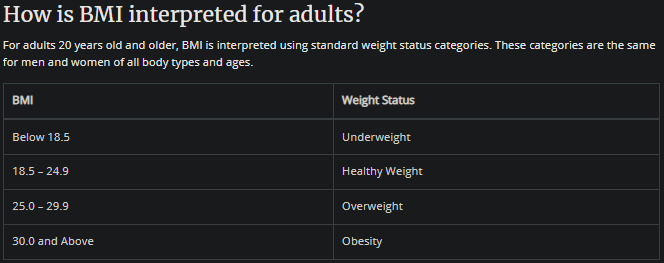

In [ ]:
# Checking BMI column changes
print(heart_df.BMI.value_counts())
heart_df.head()

In [ ]:
# Using get_dummies() to create variables for text features
heart_modeling = pd.get_dummies(heart_df)
print(heart_modeling.shape)
heart_modeling.head()

In [ ]:
# Export dataframe to CSV without index
heart_df.to_csv('Resources/heart_clean.csv', index=False)
heart_modeling.to_csv('Resources/heart_dummies.csv', index=False)